# チャレンジャー


In [5]:
import pymc as pm

from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
figsize(12.5, 4)

from os import makedirs
makedirs("data", exist_ok="True")

from urllib.request import urlretrieve
urlretrieve("https://git.io/vXknD", "data/cahllenger_data.csv")



('data/cahllenger_data.csv', <http.client.HTTPMessage at 0x1edf1206f28>)

[[ 66.   0.]
 [ 70.   1.]
 [ 69.   0.]
 [ 68.   0.]
 [ 67.   0.]
 [ 72.   0.]
 [ 73.   0.]
 [ 70.   0.]
 [ 57.   1.]
 [ 63.   1.]
 [ 70.   1.]
 [ 78.   0.]
 [ 67.   0.]
 [ 53.   1.]
 [ 67.   0.]
 [ 75.   0.]
 [ 70.   0.]
 [ 81.   0.]
 [ 76.   0.]
 [ 79.   0.]
 [ 75.   1.]
 [ 76.   0.]
 [ 58.   1.]]


([<matplotlib.axis.YTick at 0x1edf1a98ef0>,
 <a list of 2 Text yticklabel objects>)

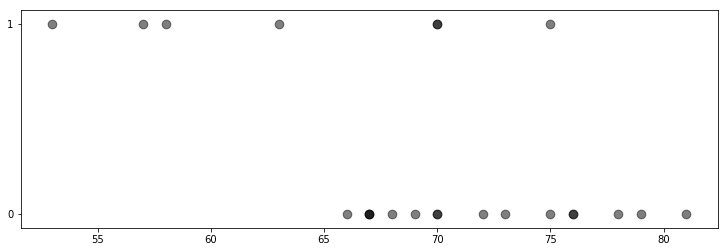

In [33]:
np.set_printoptions(precision=3, suppress=True)
challenge_data = np.genfromtxt("data/cahllenger_data.csv", skip_header=1, usecols=[1,2], 
                              missing_values="NA", delimiter=",")

challenge_data = challenge_data[~np.isnan(challenge_data[:,1])]
print(challenge_data)

plt.scatter(challenge_data[:,0], challenge_data[:,1], s=75, color="k",alpha=0.5)
plt.yticks([0, 1])

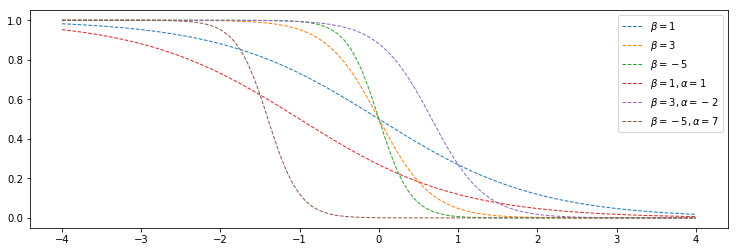

In [41]:
def logistic(x, beta, alpha=0):
    return 1.0 / (1.0 + np.exp(np.dot(beta, x) + alpha))

x = np.linspace(-4, 4, 100)

plt.plot(x, logistic(x, 1), label=r"$\beta = 1$", ls="--", lw = 1)
plt.plot(x, logistic(x, 3), label=r"$\beta = 3$", ls="--", lw = 1)
plt.plot(x, logistic(x, 5), label=r"$\beta = -5$", ls="--", lw = 1)

plt.plot(x, logistic(x, 1, 1), label=r"$\beta = 1, \alpha=1$", ls="--", lw = 1)
plt.plot(x, logistic(x, 3, -2), label=r"$\beta = 3, \alpha=-2$", ls="--", lw = 1)
plt.plot(x, logistic(x, 5, 7), label=r"$\beta = -5, \alpha=7$", ls="--", lw = 1)

plt.legend()

In [68]:
# チャレンジャーのモデリング
import pymc as pm

temperature  = challenge_data[:,0]
D = challenge_data[:,1]

beta  = pm.Normal("beta", 0, 0.001, value=0)
alpha = pm.Normal("alpha", 0, 0.001, value=0)

@pm.deterministic
def p(t=temperature, alpha=alpha, beta=beta):
    return 1.0 / (1. + np.exp(beta * t + alpha))

In [69]:
p.value

array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5])

In [70]:
observed = pm.Bernoulli("bernoulli_pbs", p, value=D, observed=True)
model = pm.Model([observed, beta, alpha])

map_ = pm.MAP(model)
map_.fit()
mcmc = pm.MCMC(model)
mcmc.sample(120000, 100000, 2)

 [-----------------100%-----------------] 120000 of 120000 complete in 9.1 sec

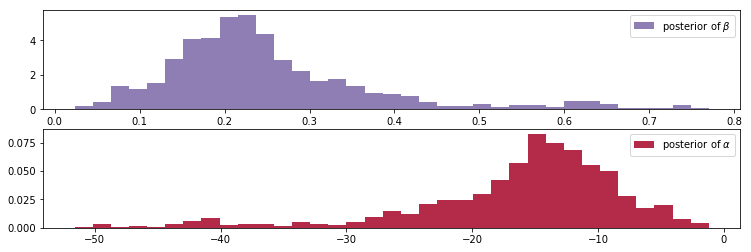

In [71]:
alpha_samples = mcmc.trace('alpha')[:, None]
beta_samples = mcmc.trace('beta')[:, None]

plt.subplot(211)
plt.hist(beta_samples, histtype='stepfilled', bins=35, alpha=0.85, color="#7A68A6", normed=True, label= r"posterior of $\beta$ ")
plt.legend()

plt.subplot(212)
plt.hist(alpha_samples, histtype='stepfilled', bins=35, alpha=0.85, color="#A60628", normed=True, label= r"posterior of $\alpha$ ")
plt.legend()

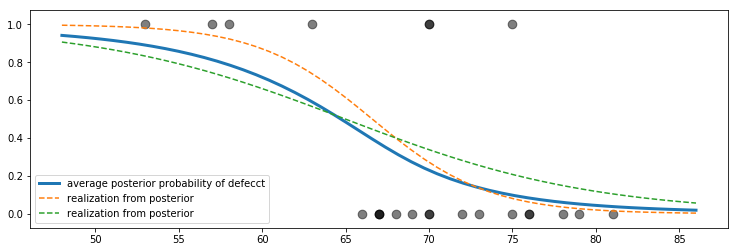

In [78]:
figsize(12.5, 4)

t = np.linspace(temperature.min()-5, temperature.max()+5, 50)[:, None]
p_t = logistic(t.T, beta_samples, alpha_samples)
mean_prob_t = p_t.mean(axis=0)
plt.plot(t, mean_prob_t, lw=3, label="average posterior probability of defecct")
plt.plot(t, p_t[0, :], ls="--", label="realization from posterior")
plt.plot(t, p_t[-2, :], ls="--", label="realization from posterior")
plt.scatter(challenge_data[:,0], challenge_data[:,1], s=75, color="k",alpha=0.5)
plt.legend()

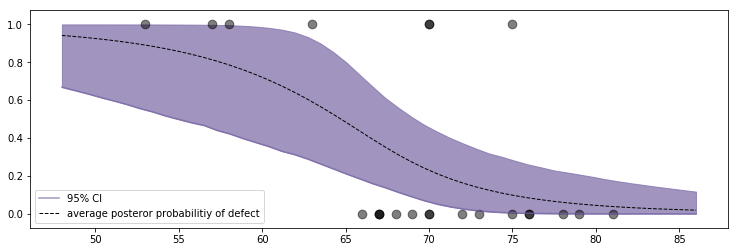

In [85]:
from scipy.stats.mstats import mquantiles
qs = mquantiles(p_t, [0.025, 0.975], axis=0)
plt.fill_between(t[:,0], *qs, alpha=0.7, color="#7A68A6")
plt.plot(t[:,0], qs[0], label="95% CI", color="#7A68A6", alpha=0.7)
plt.plot(t, mean_prob_t, lw=1, ls ="--", color="k", label="average posteror probabilitiy of defect")

plt.scatter(challenge_data[:,0], challenge_data[:,1], s=75, color="k",alpha=0.5)
plt.legend()

(array([   0.174,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
           0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
           0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
           0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
           0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
           0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
           0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
           0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
           0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
           0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
           0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
           0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
           0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
           0.   ,    0.   ,    0.   ,    0.   ,    0.349,    0.   ,
           0.   ,    0.   ,    0.   ,    0.   , 

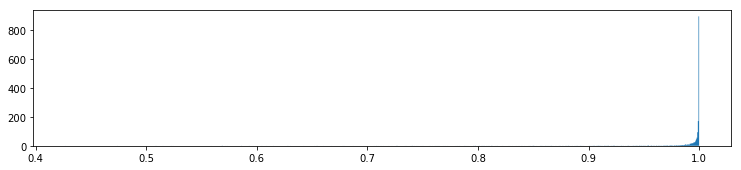

In [96]:
figsize(12.5, 2.5)

prob_31 = logistic(31, beta_samples, alpha_samples)
plt.hist(prob_31, bins=1000, normed=True, histtype='stepfilled')